## Libraries

In [2]:
import os
import numpy as np
import cv2

import pprint

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## VGG16 feature extraction

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False) # Pre-trianed model - imagenet

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def extract_features(image_path, model):
    img = load_img(image_path, target_size=(224, 224)) # Carregar a imagem
    img_array = img_to_array(img) # Transformar a imagem em um array
    img_array = np.expand_dims(img_array, axis=0) # Criar um lote com a imagem, para ajudar no processamento da imagem pela rede
    img_array = preprocess_input(img_array) # Pré-processar a imagem para a rede VGG16 especifica

    features = model.predict(img_array) # Encontrar as features da imagem
    return features.flatten() # Transformar as features em um vetor unidimensional, para melhorar a comparação



In [5]:
import os

database = {}

celebrities_folder = './data' # Diretório com as pastas das celebridades
for celebrity_name in os.listdir(celebrities_folder):
    celebrity_path = os.path.join(celebrities_folder, celebrity_name)
    if os.path.isdir(celebrity_path):
        celebrity_vectors = []
        for image_name in os.listdir(celebrity_path):
            image_path = os.path.join(celebrity_path, image_name)
            features = extract_features(image_path, base_model)
            celebrity_vectors.append(features)
        database[celebrity_name] = celebrity_vectors # Atribuir os vetores de features associados ao índice da respectiva celebridade no database


1/1 [==============================] - 0s 355ms/step


In [6]:
import pprint
pprint.pprint(database)

{'Aaron_Guiel': [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
                 array([ 0.     ,  0.     ,  0.     , ...,  0.     , 17.08794,  0.     ],
      dtype=float32)],
 'Ben_Lee': [array([0.       , 0.       , 0.       , ..., 0.       , 3.7836027,
       4.7713842], dtype=float32),
             array([ 0.       ,  0.       ,  0.       , ...,  0.       , 22.009975 ,
        5.7654047], dtype=float32)],
 'Edwin_Edwards': [array([ 0.      ,  0.      ,  0.      , ...,  0.      , 15.909018,
        0.      ], dtype=float32),
                   array([0.      , 0.      , 0.      , ..., 0.      , 7.482959, 0.      ],
      dtype=float32)],
 'Emmanuel_Milingo': [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
                      array([ 0.      ,  0.      ,  0.      , ...,  0.      , 40.209187,
        0.      ], dtype=float32)],
 'Joe_Torre': [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
               array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
 'Patri

## Minkowski Distance - different distance measures varying p

In [7]:
def minkowski_distance(x, y, p=2): # p == 2 => euclidean distance
    return np.linalg.norm(x - y, ord=p)

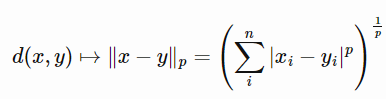

In [8]:
def people_match(input_features, database):
    best_match = None
    lowest_distance = float('inf')

    for celebrity_name, celebrity_vectors in database.items():
        for vector in celebrity_vectors:
            distance = minkowski_distance(input_features, vector)
            if distance < lowest_distance:
                lowest_distance = distance
                best_match = celebrity_name

    return best_match


## Testing with a celebrity in database

In [9]:
descritor_new = database['Tom_Cruise'][0]
matched_celebrity = people_match(descritor_new, database)
print("The image belongs to :", matched_celebrity)

The image belongs to : Tom_Cruise


## Testing with a new celebrity

In [10]:
tom_no_mask = './Tom_Hanks/Tom_Hanks_no_mask.jpg'

tom_mask = './Tom_Hanks/Tom_Hanks_mask.jpg'

In [11]:
features = extract_features(tom_no_mask, base_model)
database['Tom Hanks'] = features

1/1 [==============================] - 0s 266ms/step


In [12]:
database['Tom Hanks']

array([0.       , 0.       , 0.       , ..., 0.       , 2.8277326,
       0.       ], dtype=float32)

In [13]:
feature_com_mascara = extract_features(tom_mask, base_model)

1/1 [==============================] - 0s 265ms/step


In [14]:
person = people_match(feature_com_mascara, database)
print("The image belongs to :", person)

The image belongs to : Tom Hanks
